In [2]:
import mglearn as mglearn
import np as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

!pip install numpy scipy scikit-learn matplotlib pandas

Invalid -W option ignored: unknown warning category: 'ConvergenceWarning'
You should consider upgrading via the '/Users/engineer/workspace/cse590-machine-learning/venv/bin/python -m pip install --upgrade pip' command.


# Train the Classifiers

## Import data, setup models

In [34]:
from sklearn.neighbors import KNeighborsClassifier
import os
import warnings
import sys

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = ('ignore::UserWarning,ignore::ConvergenceWarning,ignore::RuntimeWarning')
train_set = pd.read_csv("./spam_train.csv")
test_set = pd.read_csv("./spam_test.csv")

X_train = np.array(train_set[list(train_set.columns[1:-1])])
y_train = np.array(train_set["class"])
X_test = np.array(test_set[list(test_set.columns[1:-1])])
y_test = np.array(test_set["class"])

np.random.seed(2)

knn = KNeighborsClassifier(n_neighbors=int(1)).fit(X_train, y_train)
print("KNN Training score: {:.8f}".format(knn.score(X_train, y_train)))
print(
    "KNN Testing score: {:.8f}".format(knn.score(X_test, y_test))
)


logreg = LogisticRegression().fit(X_train, y_train)
print("Logistic Regression Training score: {:.8f}".format(logreg.score(X_train, y_train)))
print(
    "Logistic Regression Testing score: {:.8f}".format(logreg.score(X_test, y_test))
)

lsvc = LinearSVC().fit(X_train, y_train)
print("LinearSVC Training score: {:.8f}".format(lsvc.score(X_train, y_train)))
print("LinearSVC Testing score: {:.8f}".format(lsvc.score(X_test, y_test)))

KNN Training score: 0.99971014
KNN Testing score: 0.80278019
Logistic Regression Training score: 0.92869565
Logistic Regression Testing score: 0.91225022
LinearSVC Training score: 0.86550725
LinearSVC Testing score: 0.86099044


## KNN validator

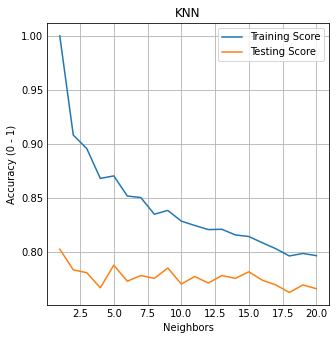

Test set predictions: [1 0 0 ... 1 0 1]
Test set accuracy: 0.77
0.8704347826086957
0.788010425716768


In [21]:
plt.style.use('_mpl-gallery')
x = np.linspace(1, 20, 20)
results = []
for neighbor_count in x:
    clf = KNeighborsClassifier(n_neighbors=int(neighbor_count))
    clf.fit(X_train, y_train)
    results.append(
        [
            neighbor_count,
            clf.score(X_train, y_train),
            clf.score(X_test, y_test)
        ]
    )

fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(4)
x = [neighbors[0] for neighbors in results]
plt.title("KNN")
plt.xlabel("Neighbors")
plt.ylabel("Accuracy (0 - 1)")
plt.plot(x, [train[1] for train in results], label='Training Score')
plt.plot(x, [test[2] for test in results], label='Testing Score')
plt.legend()
# fig = plt.figure()
plt.show()
#

print("Test set predictions: {}".format(clf.predict(X_test)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))
clf = KNeighborsClassifier(n_neighbors=int(5))
clf.fit(X_train, y_train)

print( clf.score(X_train, y_train))
print( clf.score(X_test, y_test))

## 5-fold Cross-validation on Logistic Regression

In [23]:
# logreg = LogisticRegression(C=19.737373737373737).fit(X_train, y_train)
# print("Logistic Regression Training score: {:.8f}".format(logreg.score(X_train, y_train)))
# print("Logistic Regression Testing score: {:.8f}".format(logreg.score(X_test, y_test)))
#
# logreg = LogisticRegression(C=20.252525252525253).fit(X_train, y_train)
# print("Logistic Regression Training score: {:.8f}".format(logreg.score(X_train, y_train)))
# print("Logistic Regression Testing score: {:.8f}".format(logreg.score(X_test, y_test)))


# # # create a log scale of c to find best ranges
# c_vals = np.logspace(0,4,10)
# hyperparameters = dict(C=c_vals)
# print(c_vals)
#
# # Find best parameters using grid search
# from sklearn.model_selection import GridSearchCV
# # noinspection ConvergenceWarning
# clf = GridSearchCV(logreg, hyperparameters, cv=5)
# #Fit model
# clf.fit(X_train,y_train)
# scores_logreg = cross_val_score(logreg, X_train, y_train, cv=5)
# print(scores_logreg)
# print(clf.best_params_)
# #
# # create a log scale of c to find best ranges
# c_vals = np.logspace(1,1.7,10)
# hyperparameters = dict(C=c_vals)
# print(c_vals)
#
# # Find best parameters using grid search
# from sklearn.model_selection import GridSearchCV
# clf = GridSearchCV(logreg, hyperparameters, cv=5)
# #Fit model
# clf.fit(X_train,y_train)
# # scores_logreg = cross_val_score(logreg, X_train, y_train, cv=5)
# # print(scores_logreg)
# print(clf.best_params_)
#
# # create a log scale of c to find best ranges
c_vals = np.linspace(19,23,100)
hyperparameters = dict(C=c_vals)
print(c_vals)

# Find best parameters using grid search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logreg, hyperparameters, cv=5)
#Fit model
clf.fit(X_train,y_train)
# scores_logreg = cross_val_score(logreg, X_train, y_train, cv=5)
# print(scores_logreg)
print(clf.best_params_)

[19.         19.04040404 19.08080808 19.12121212 19.16161616 19.2020202
 19.24242424 19.28282828 19.32323232 19.36363636 19.4040404  19.44444444
 19.48484848 19.52525253 19.56565657 19.60606061 19.64646465 19.68686869
 19.72727273 19.76767677 19.80808081 19.84848485 19.88888889 19.92929293
 19.96969697 20.01010101 20.05050505 20.09090909 20.13131313 20.17171717
 20.21212121 20.25252525 20.29292929 20.33333333 20.37373737 20.41414141
 20.45454545 20.49494949 20.53535354 20.57575758 20.61616162 20.65656566
 20.6969697  20.73737374 20.77777778 20.81818182 20.85858586 20.8989899
 20.93939394 20.97979798 21.02020202 21.06060606 21.1010101  21.14141414
 21.18181818 21.22222222 21.26262626 21.3030303  21.34343434 21.38383838
 21.42424242 21.46464646 21.50505051 21.54545455 21.58585859 21.62626263
 21.66666667 21.70707071 21.74747475 21.78787879 21.82828283 21.86868687
 21.90909091 21.94949495 21.98989899 22.03030303 22.07070707 22.11111111
 22.15151515 22.19191919 22.23232323 22.27272727 22.3

## 5-fold cv for linearSVC

In [42]:
np.random.seed(42)

lsvc = LinearSVC(C=0.010101010101010102).fit(X_train, y_train)
print("Linear SVC Training score: {:.3f}".format(lsvc.score(X_train, y_train)))
print("Linear SVC Testing score: {:.3f}".format(lsvc.score(X_test, y_test)))
#
# lsvc = LinearSVC(C=0.75).fit(X_train, y_train)
# print("Linear SVC Training score: {:.3f}".format(lsvc.score(X_train, y_train)))
# print("Linear SVC Testing score: {:.3f}".format(lsvc.score(X_test, y_test)))

#
# # create a log scale of c to find best ranges
# c_vals = np.logspace(-1,3,10)
# hyperparameters = dict(C=c_vals)
# print(c_vals)
#
# # Find best parameters using grid search
# from sklearn.model_selection import GridSearchCV
# # noinspection ConvergenceWarning
# clf = GridSearchCV(lsvc, hyperparameters, cv=5)
# #Fit model
# clf.fit(X_train,y_train)
# # scores_logreg = cross_val_score(logreg, X_train, y_train, cv=5)
# # print(scores_logreg)
# print(clf.best_params_)
#
# lsvc = LinearSVC(C=clf.best_params_['C']).fit(X_train, y_train)
# print("Linear SVC Training score: {:.3f}".format(lsvc.score(X_train, y_train)))
# print("Linear SVC Testing score: {:.3f}".format(lsvc.score(X_test, y_test)))
# # create a log scale of c to find best ranges
# c_vals = np.logspace(3,4,10)
# hyperparameters = dict(C=c_vals)
# print(c_vals)
#
# # Find best parameters using grid search
# from sklearn.model_selection import GridSearchCV
# clf = GridSearchCV(lsvc, hyperparameters, cv=5)
# #Fit model
# clf.fit(X_train,y_train)
# # scores_logreg = cross_val_score(logreg, X_train, y_train, cv=5)
# # print(scores_logreg)
# print(clf.best_params_)
#

# # create a log scale of c to find best ranges
# c_vals = np.linspace(0,1,100)
# hyperparameters = dict(C=c_vals)
# # print(c_vals)

# # Find best parameters using grid search
# from sklearn.model_selection import GridSearchCV
# clf = GridSearchCV(lsvc, hyperparameters, cv=5)
# #Fit model
# clf.fit(X_train,y_train)
# # scores_logreg = cross_val_score(logreg, X_train, y_train, cv=5)
# # print(scores_logreg)
# print(clf.best_params_)

Linear SVC Training score: 0.911
Linear SVC Testing score: 0.901
